Importing Libraries

In [1]:
import os
import cv2
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import accuracy_score
import scikitplot
from matplotlib import pyplot
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
from IPython.display import display
from PIL import Image

In [3]:
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout, Flatten, GlobalMaxPool2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import models, layers, regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Dataset Exploration

In [4]:
path='C:/Users/nagar/OneDrive/Desktop/CK+48'
print(os.listdir(path))
data_dir_list = os.listdir(path)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


Data Preparation

In [5]:
img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize) 

Loaded the images of dataset-anger

Loaded the images of dataset-contempt

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise



In [6]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

(981, 48, 48)

In [7]:
num_classes = 7
batch_size = 1
epochs = 50
width, height = 48, 48

Converting categorical data to Numerical

In [8]:
num_classes = 7

num_of_samples = img_data.shape[0]
label = np.ones((num_of_samples,),dtype='int64')

                         
label[0:134]= 0 #135
                         
label[135:188]= 1 #54
                        
label[189:365]= 2 #177
                         
label[366:440]= 3 #75
                        
label[441:647]= 4 #207
                         
label[648:731]= 5 #84
                         
label[732:980]= 6 #249
names = ['anger', 'contempt', 'disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger', 'contempt', 'disgust','fear','happy','sadness','surprise'][id]

Shuffle and Split the data inorder to train and test

In [9]:
K = np_utils.to_categorical(label, num_classes)
x,y = shuffle(img_data,K)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_test=X_test

In [11]:
X_train = np.array(X_train, 'float32')
y_train = np.array(y_train, 'float32')
X_test = np.array(X_test, 'float32')
y_test = np.array(y_test, 'float32')

In [12]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_train, axis=0)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

Building CNN model

In [13]:
model = Sequential()
model.add(Conv2D(filters = 6, kernel_size = (5, 5), input_shape = (48,48,1), padding='same', activation = 'tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 16,  kernel_size = (5, 5), padding='same', activation = 'tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64,  kernel_size = (5, 5), padding= 'same', activation = 'tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Using Early stopping method to overcome overfitting of the model

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        25664     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [15]:
history = model.fit(X_train, y_train, batch_size=1, epochs=50, verbose=1, validation_data=(X_test, y_test))

Train on 686 samples, validate on 295 samples
Epoch 1/50
686/686 [==============================] - 4s 6ms/step - loss: 1.0645 - accuracy: 0.6545 - val_loss: 0.9651 - val_accuracy: 0.7390
Epoch 2/50
686/686 [==============================] - 4s 6ms/step - loss: 0.3871 - accuracy: 0.8703 - val_loss: 0.5017 - val_accuracy: 0.8644
Epoch 3/50
686/686 [==============================] - 4s 6ms/step - loss: 0.2750 - accuracy: 0.9009 - val_loss: 0.3597 - val_accuracy: 0.9119
Epoch 4/50
686/686 [==============================] - 4s 6ms/step - loss: 0.1616 - accuracy: 0.9504 - val_loss: 0.6686 - val_accuracy: 0.7898
Epoch 5/50
686/686 [==============================] - 4s 6ms/step - loss: 0.1597 - accuracy: 0.9475 - val_loss: 0.3716 - val_accuracy: 0.8508
Epoch 6/50
686/686 [==============================] - 4s 6ms/step - loss: 0.1466 - accuracy: 0.9490 - val_loss: 0.4242 - val_accuracy: 0.8610
Epoch 7/50
686/686 [==============================] - 4s 6ms/step - loss: 0.1928 - accuracy: 0.9431 - 

In [16]:
model.save('CNN.h5')

In [17]:
import keras
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

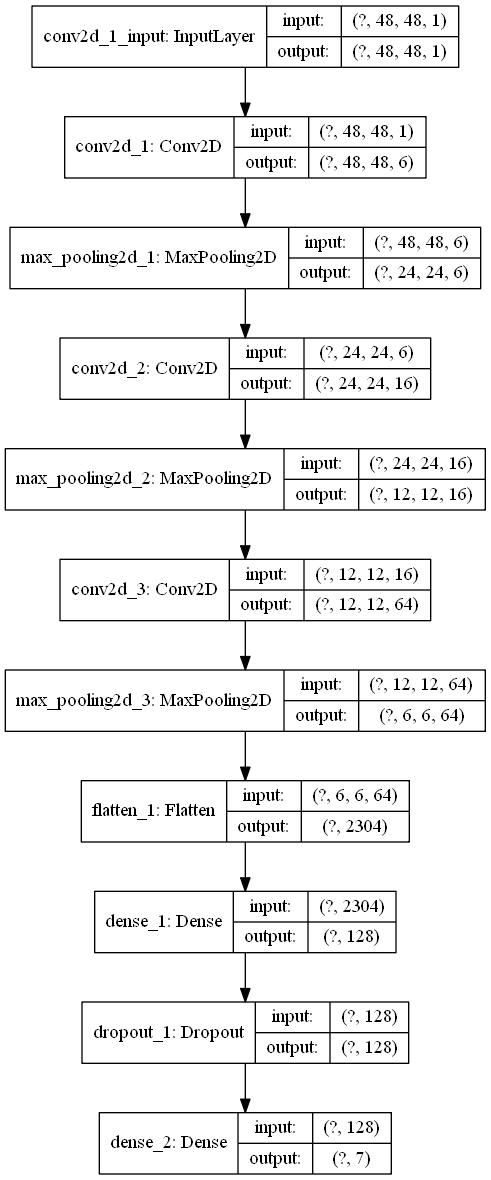

In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='emotion.png', show_shapes=True, show_layer_names=True)
Image(filename='emotion.png')

In [19]:
score_cnn = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score_cnn[0])
print('Test accuracy:', score_cnn[1])

Test Loss: 0.15353156205580443
Test accuracy: 0.9525423645973206


(1, 48, 48, 1)
[[4.3351087e-01 5.5972403e-01 7.7747635e-04 4.2202581e-05 9.5003131e-08
  5.9050401e-03 4.0298568e-05]]
[1]
[[1. 0. 0. 0. 0. 0. 0.]]


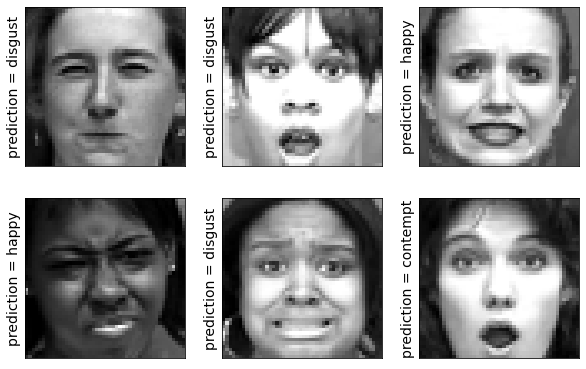

In [20]:
test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

res = model.predict_classes(X_test[9:18])
plt.figure(figsize=(10, 10))

for i in range(0, 6):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)

plt.show()

<Figure size 432x288 with 0 Axes>

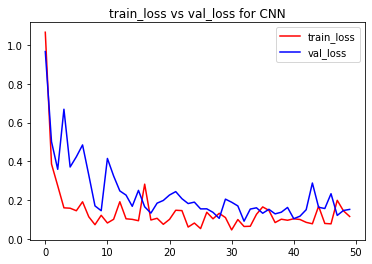

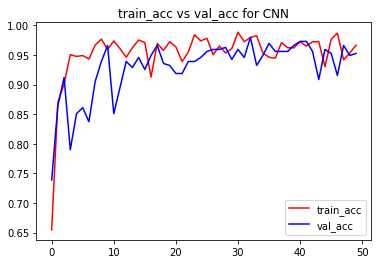

<Figure size 432x288 with 0 Axes>

In [21]:
%matplotlib inline

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss for CNN')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc for CNN')
plt.legend()
plt.figure()

In [22]:
import scikitplot
from matplotlib import pyplot
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

295/295 [==============================] - 0s 373us/step
Accuracy of the model is -  95.25423645973206 %


total wrong validation predictions: 14


              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.80      0.91      0.85        22
           2       1.00      0.91      0.95        58
           3       0.89      1.00      0.94        17
           4       1.00      1.00      1.00        64
           5       0.95      0.87      0.91        23
           6       0.96      1.00      0.98        70

    accuracy                           0.95       295
   macro avg       0.93      0.94      0.94       295
weighted avg       0.96      0.95      0.95       295



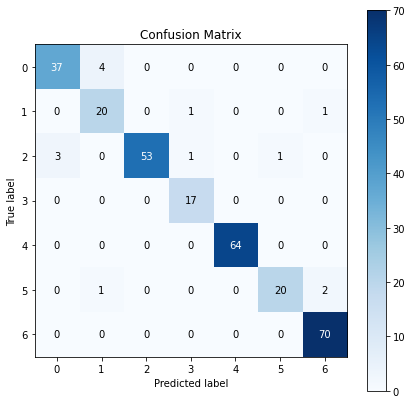

In [24]:
yhat_valid = model.predict_classes(X_test)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_valid))

SVM Model:

In [25]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 128, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(layers.Dense(7,kernel_regularizer=regularizers.l2(0.01),activation = "softmax"))

In [26]:
model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])

In [27]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.00005,patience=11,verbose=1,restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=7,min_lr=1e-7,verbose=1)

callbacks = [early_stopping,lr_scheduler]

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)        

In [29]:
hist = model.fit(X_train, y_train, batch_size=1, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks)

Train on 686 samples, validate on 295 samples
Epoch 1/50
686/686 [==============================] - 2s 3ms/step - loss: 1.1826 - accuracy: 0.3703 - val_loss: 1.1776 - val_accuracy: 0.5593
Epoch 2/50
686/686 [==============================] - 2s 3ms/step - loss: 1.0674 - accuracy: 0.5948 - val_loss: 1.1347 - val_accuracy: 0.6271
Epoch 3/50
686/686 [==============================] - 2s 3ms/step - loss: 1.0442 - accuracy: 0.6210 - val_loss: 1.1205 - val_accuracy: 0.6475
Epoch 4/50
686/686 [==============================] - 2s 3ms/step - loss: 1.0168 - accuracy: 0.6953 - val_loss: 1.0586 - val_accuracy: 0.6508
Epoch 5/50
686/686 [==============================] - 2s 3ms/step - loss: 0.9989 - accuracy: 0.7434 - val_loss: 1.0727 - val_accuracy: 0.7017
Epoch 6/50
686/686 [==============================] - 2s 3ms/step - loss: 0.9767 - accuracy: 0.7915 - val_loss: 1.0582 - val_accuracy: 0.7898
Epoch 7/50
686/686 [==============================] - 2s 2ms/step - loss: 0.9559 - accuracy: 0.8265 - 

In [30]:
model.save('SVM.h5')

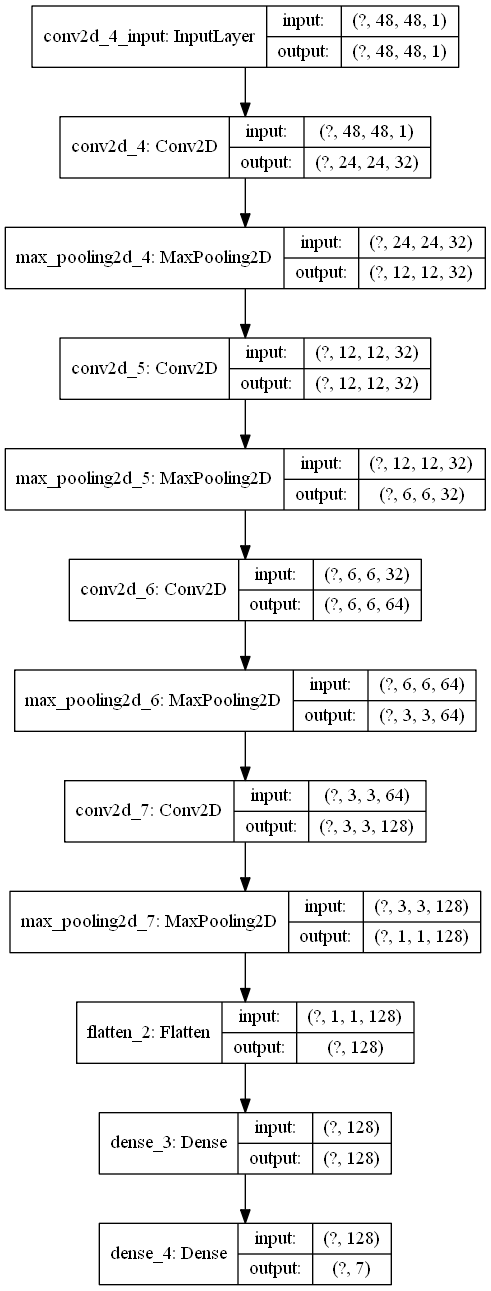

In [31]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image(filename='model.png')

In [32]:
score_svm = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score_svm[0])
print('Test accuracy:', score_svm[1])

295/295 [==============================] - 0s 1ms/step
Test Loss: 1.0094768079660708
Test accuracy: 0.8847457766532898


(1, 48, 48, 1)
[[0.11386394 0.23325098 0.07624748 0.0855204  0.07545093 0.2949656
  0.12070072]]
[5]
[[1. 0. 0. 0. 0. 0. 0.]]


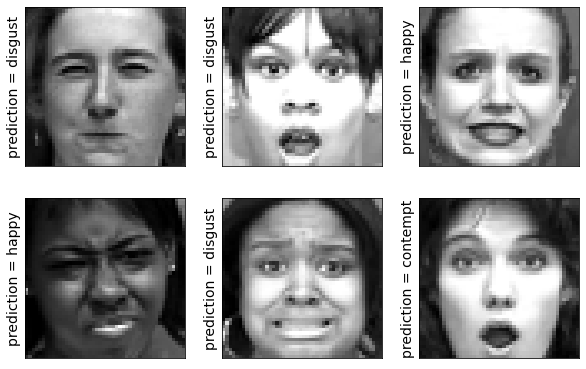

In [33]:
test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

res = model.predict_classes(X_test[9:18])
plt.figure(figsize=(10, 10))

for i in range(0, 6):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)

plt.show()

<Figure size 432x288 with 0 Axes>

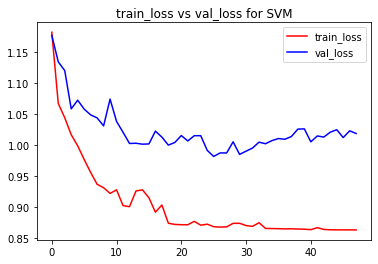

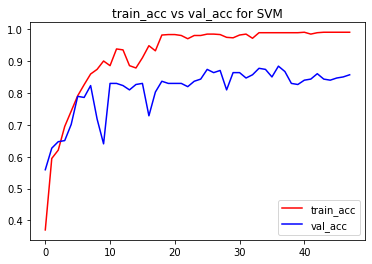

<Figure size 432x288 with 0 Axes>

In [34]:
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss for SVM')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc for SVM')
plt.legend()
plt.figure()

total wrong validation predictions: 34


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.58      0.86      0.69        22
           2       1.00      0.84      0.92        58
           3       0.92      0.65      0.76        17
           4       1.00      0.98      0.99        64
           5       0.75      0.65      0.70        23
           6       0.92      1.00      0.96        70

    accuracy                           0.88       295
   macro avg       0.85      0.83      0.83       295
weighted avg       0.90      0.88      0.89       295



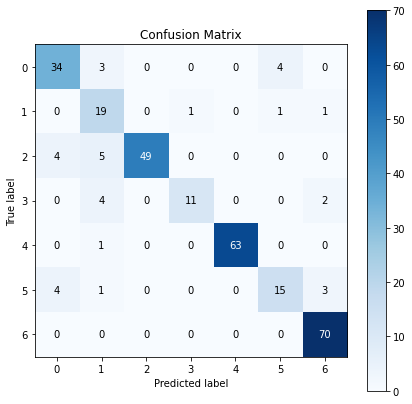

In [35]:
yhat_valid = model.predict_classes(X_test)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_valid))

Artificial Neural Networks

In [36]:
model_ann = Sequential()
model_ann.add(layers.Dense(32, input_shape=(48,48,1), activation='relu'))
model_ann.add(layers.Dropout(0.4))
model_ann.add(layers.Dense(64, activation='relu'))
model_ann.add(layers.Dropout(0.5))
model_ann.add(layers.Dense(128, activation='relu'))
model_ann.add(layers.Dropout(0.4))
model_ann.add(layers.Flatten())
model_ann.add(layers.Dense(7, activation='softmax'))

In [37]:
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.00005,patience=15,verbose=1,restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=10,min_lr=1e-7,verbose=1)

callbacks = [early_stopping,lr_scheduler]

In [39]:
model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 48, 48, 32)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
dense_6 (Dense)              (None, 48, 48, 64)        2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
dense_7 (Dense)              (None, 48, 48, 128)       8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 294912)           

In [40]:
histt = model_ann.fit(X_train, y_train, batch_size=1, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks)

Train on 686 samples, validate on 295 samples
Epoch 1/50
686/686 [==============================] - 22s 32ms/step - loss: 0.3298 - accuracy: 0.8853 - val_loss: 0.4094 - val_accuracy: 0.8571
Epoch 2/50
686/686 [==============================] - 24s 35ms/step - loss: 0.1522 - accuracy: 0.9448 - val_loss: 0.4010 - val_accuracy: 0.8571
Epoch 3/50
686/686 [==============================] - 23s 34ms/step - loss: 0.1222 - accuracy: 0.9642 - val_loss: 0.4069 - val_accuracy: 0.8571
Epoch 4/50
686/686 [==============================] - 23s 34ms/step - loss: 0.0835 - accuracy: 0.9788 - val_loss: 0.4118 - val_accuracy: 0.8571
Epoch 5/50
686/686 [==============================] - 22s 32ms/step - loss: 0.0664 - accuracy: 0.9800 - val_loss: 0.4111 - val_accuracy: 0.8571
Epoch 6/50
686/686 [==============================] - 22s 32ms/step - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.4123 - val_accuracy: 0.8571
Epoch 7/50
686/686 [==============================] - 23s 33ms/step - loss: 0.0625 - accur

In [41]:
model_ann.save('ANN.h5')

In [42]:
score_ann = model_ann.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score_ann[0])
print('Test accuracy:', score_ann[1])

295/295 [==============================] - 0s 1ms/step
Test Loss: 0.40943862947367005
Test accuracy: 0.8571428656578064


(1, 48, 48, 1)
[[0.14087924 0.14894024 0.13912122 0.14047056 0.14368011 0.14444843
  0.1424603 ]]
[1]
[[1. 0. 0. 0. 0. 0. 0.]]


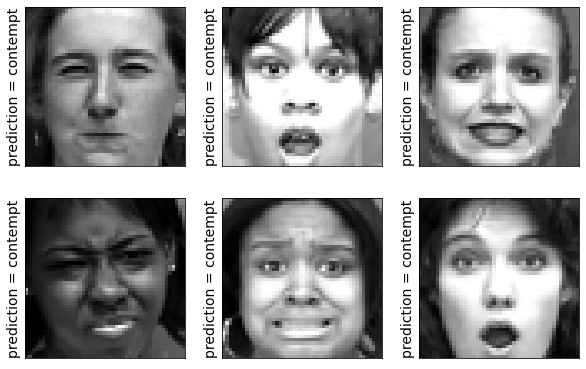

In [43]:
test_image = X_test[0:1]
print (test_image.shape)

print(model_ann.predict(test_image))
print(model_ann.predict_classes(test_image))
print(y_test[0:1])

res = model_ann.predict_classes(X_test[9:18])
plt.figure(figsize=(10, 10))

for i in range(0, 6):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)

plt.show()

<Figure size 432x288 with 0 Axes>

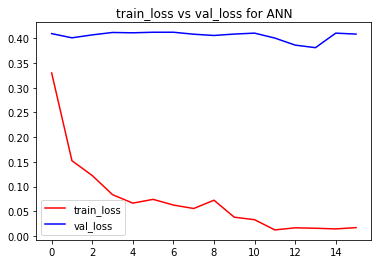

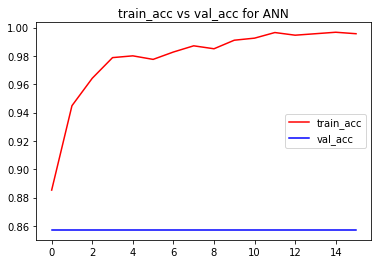

<Figure size 432x288 with 0 Axes>

In [44]:
%matplotlib inline

train_loss=histt.history['loss']
val_loss=histt.history['val_loss']
train_acc=histt.history['accuracy']
val_acc=histt.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss for ANN')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc for ANN')
plt.legend()
plt.figure()

total wrong validation predictions: 264


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.08      1.00      0.14        22
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00        17
           4       0.75      0.09      0.17        64
           5       1.00      0.04      0.08        23
           6       1.00      0.03      0.06        70

    accuracy                           0.11       295
   macro avg       0.40      0.17      0.06       295
weighted avg       0.48      0.11      0.07       295



D:\Anaconda installation\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda installation\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda installation\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


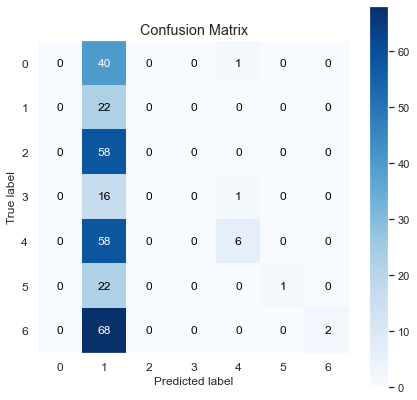

In [46]:
yhat_valid = model_ann.predict_classes(X_test)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_valid))